In [2]:
import networkx as nx
import numpy as np
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style='white', rc={'figure.figsize':(10,8)})

In [17]:
forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,  # Dissuade hubs
    linLogMode=False,  # NOT IMPLEMENTED
    adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
    edgeWeightInfluence=1.0,

    # Performance
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,  # NOT IMPLEMENTED

    # Tuning
    scalingRatio=2.0,
    strongGravityMode=False,
    gravity=1.0,

    # Log
    verbose=True
)

  1%|          | 34/5000 [00:00<00:14, 336.63it/s]

Name: 
Type: Graph
Number of nodes: 625
Number of edges: 1200
Average degree:   3.8400


100%|██████████| 5000/5000 [00:09<00:00, 508.64it/s]


BarnesHut Approximation  took  4.11  seconds
Repulsion forces  took  4.64  seconds
Gravitational forces  took  0.08  seconds
Attraction forces  took  0.07  seconds
AdjustSpeedAndApplyForces step  took  0.49  seconds


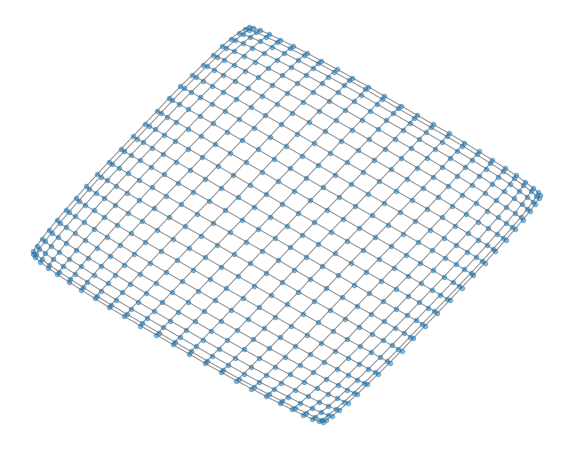

In [5]:
G = nx.grid_2d_graph(25,25)
print(nx.info(G))
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=5000)
nx.draw_networkx(G, positions, node_size=20, with_labels=False, alpha=0.5)
plt.axis('off')
plt.show()

In [44]:
adjacencies = np.load("../data/umap_connectvitities.npy", allow_pickle=True)
flow_data = pd.read_parquet("../data/flow_data.parquet")

In [30]:
fa_results = forceatlas2.forceatlas2(G=adjacencies, pos=flow_data, iterations=500)

100%|██████████| 500/500 [00:18<00:00, 27.34it/s]

BarnesHut Approximation  took  7.95  seconds
Repulsion forces  took  9.06  seconds
Gravitational forces  took  0.06  seconds
Attraction forces  took  0.54  seconds
AdjustSpeedAndApplyForces step  took  0.34  seconds


In [39]:
import pandas as pd
fa_results = pd.DataFrame(fa_results).rename(columns={x: f"fa2_{x+1}" for x in range(np.array(fa_results).shape[1])})

In [40]:
fa_results

,fa2_1,fa2_2
0,19183.381621,8416.379162
1,15297.702233,14988.202249
2,15424.852933,14549.756223
3,16942.539820,6629.543380
4,-6031.766811,-7954.483447
...,...,...
4371,-3891.022006,21736.816751
4372,-4625.894146,-9226.656949
4373,501.353975,19121.113658
4374,-5541.538339,-8699.910255


Text(0, 0.5, 'fa2_2')

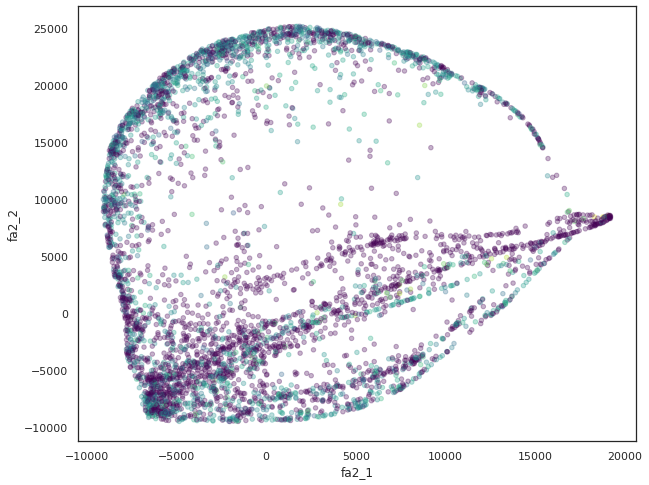

In [48]:
plt.scatter(
    x     = fa_results["fa2_1"],
    y     = fa_results["fa2_2"],
    s     = 20,
    alpha = 0.3,
    cmap  = 'viridis',
    c     = np.log(flow_data["162Dy_CD8a Cell Intensity"]+1)
)
plt.xlabel("fa2_1")
plt.ylabel("fa2_2")